In [41]:
import pandas as pd
import string

In [42]:
df=pd.read_csv("final_all_names_code.csv")

In [43]:
df.shape

(404062, 3)

In [44]:
len(df["Country_code"].unique())

78

In [45]:
len(df["Country"].unique())

63

In [46]:
df["Country_code"].value_counts()

Country_code
en_IE    6212
nl_NL    6206
es_MX    6193
th       6189
ga_IE    6156
         ... 
tl_PH    3425
nl_BE    3412
sk_SK    3325
ko_KR    3178
ta_IN    2992
Name: count, Length: 78, dtype: int64

In [47]:
df["Country"].value_counts()

Country
TH    17326
IN    16573
CA    16497
CH    15719
IE    12368
      ...  
LU     3623
MT     3478
BE     3412
SK     3325
KR     3178
Name: count, Length: 63, dtype: int64

In [48]:
columns=list(string.ascii_lowercase)+['Country_code','Country']
newdf=pd.DataFrame(columns=columns)

In [49]:
newdf

,a,b,c,d,e,f,g,h,i,j,...,s,t,u,v,w,x,y,z,Country_code,Country


In [50]:
ind=0
name=df['Name'][ind]

In [51]:
Hash_Arrays=[]
for ind in range(10000):
    name=df["Name"][ind]
    nameLst=str(name).split(' ')
    Lastname=nameLst[-1].lower()
    chars=dict.fromkeys(columns,0)
    for i in Lastname:
        chars[i]=1
    chars["Country_code"]=df["Country_code"][ind]
    chars["Country"]=df["Country"][ind]
    Hash_Arrays.append(chars)
aux_pd=pd.DataFrame(Hash_Arrays)
newdf=pd.concat([newdf,aux_pd], ignore_index=True)

In [52]:
newdf["Country"]

0       AE
1       AE
2       AE
3       AE
4       AE
        ..
9995    EG
9996    EG
9997    EG
9998    EG
9999    EG
Name: Country, Length: 10000, dtype: object

In [53]:
newdf.head()

,a,b,c,d,e,f,g,h,i,j,...,t,u,v,w,x,y,z,Country_code,Country,.
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,ar_AE,AE,NaN
1,0,0,0,0,0,0,1,1,1,0,...,1,0,0,1,0,0,0,ar_AE,AE,NaN
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ar_AE,AE,NaN
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,ar_AE,AE,NaN
4,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,ar_AE,AE,NaN


In [54]:
newdf.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       'Country_code', 'Country', '.'],
      dtype='object')

In [55]:
newdf.drop(['.'],axis=1,inplace=True)

In [56]:
newdf.head()

,a,b,c,d,e,f,g,h,i,j,...,s,t,u,v,w,x,y,z,Country_code,Country
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,ar_AE,AE
1,0,0,0,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,ar_AE,AE
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,ar_AE,AE
3,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,ar_AE,AE
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,ar_AE,AE


In [57]:
from sklearn.preprocessing import LabelEncoder 

In [58]:
X=newdf[list(string.ascii_lowercase)]
Y=newdf['Country']

In [59]:
X

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
9997,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
9998,1,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
Y

0       AE
1       AE
2       AE
3       AE
4       AE
        ..
9995    EG
9996    EG
9997    EG
9998    EG
9999    EG
Name: Country, Length: 10000, dtype: object

In [61]:
le=LabelEncoder()
Y=le.fit_transform(Y)

In [62]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X=st.fit_transform(X)

In [38]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
X

array([[-0.92593473, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358, -0.30243139],
       [-0.92593473, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358, -0.30243139],
       [-0.92593473, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358, -0.30243139],
       ...,
       [ 1.07998973, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358, -0.30243139],
       [ 1.07998973, -0.36118478,  2.21274183, ..., -0.09476245,
        -0.33370358, -0.30243139],
       [ 1.07998973, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358,  3.30653508]])

In [64]:
newdf['Country'].unique()

array(['AE', 'EG'], dtype=object)

In [65]:
newdf['Country'].value_counts()

Country
AE    5913
EG    4087
Name: count, dtype: int64

In [66]:
from keras.models import Sequential
from keras.layers import Dense

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [76]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(100,50,30),activation='relu',learning_rate_init=0.01,n_iter_no_change=30,max_iter=500)
mlp.fit(X_train,Y_train)

Y_pred=mlp.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.5705

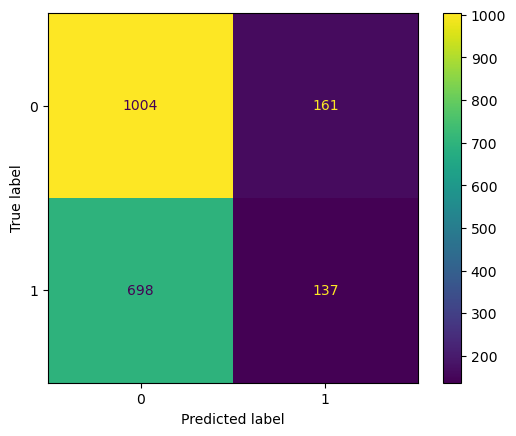

In [80]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()